In [1]:
import tensorflow as tf
from tensorflow.contrib import autograph #import autograph from contrib package to use graph mode
%load_ext tensorboard
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import seaborn as sns
from scipy import stats 
from scipy import linalg

In [2]:
print(tf.__version__)

1.15.0


-----

**Control Statements in TensorFlow**

- Syntax of if:
    
        tf.cond(condition, execute if it is true, execute if condition is false)
- Syntax of while:
    - while_loop implements non-strict semantics, enabling multiple iterations to run parallel
    
            tf.while_loop(cond, body, loop_vars, shape_invariants = None, parallel_iterations = 10 ...)
 

In [3]:
g3 = tf.Graph()

with g3.as_default():
    @tf.function
    def cond(Calculated_op, Desired_op): #condition on which while will iterate
        return tf.math.not_equal(Calculated_op, Desired_op) #return equality beteween Calculated_op, Desired_op
    
    @tf.function
    def body(Calculated_op, Desired_op): #body will execute
        #checks if calculated value is greater than Desired_op and take decision
        re = tf.cond(tf.less(Calculated_op, Desired_op), lambda: Calculated_op + 10, lambda: Calculated_op - 10)
        return [re, Desired_op]
    
    Calculated_op = tf.constant(100)
    Desired_op = tf.constant(50000)
    
with tf.Session(graph = g3) as sess:
    res = sess.run(tf.while_loop(cond, body, [Calculated_op, Desired_op]))
    print(res)


[50000, 50000]


-----
**Class Exercise**
- Simple Calculator using Class and Functions

In [4]:

class calculator():

    def __init__(self, radius):
        self.radius = radius

    def compute_area(self):
        g = tf.Graph()

        with g.as_default():

            pi = tf.constant(3.14, name="pi")
            float_radius = tf.constant(self.radius, dtype=tf.float32, name = "radius")

            r2 = tf.pow(float_radius, 2)
            result = tf.math.multiply(pi, r2)

            with tf.Session() as sess:
                output = sess.run(result)
                return output


radius = int(input("Please enter a number for the radius of a circle: "))

c = calculator(radius)
print(c.compute_area())


Please enter a number for the radius of a circle: 4
50.24


-----

**Data Mining**

1. What is __data mining?__
    - is defined as the process of discovering patterns in data 
    - is about solving problems by analyzing data already present in datasets / databases 
    - In data mining, the data is stored electronically, and the search is automated 
    - Data mining is a topic that involves learning in a practical, nontheoretical sense
    - It is about finding and describing previously unknown patterns in data 
    - The output may include a description of a structure that can be used to classify unknown examples
    - It is about the acquision of knowledge and the ability to use it
    
**Machine Learning**
2. What is __machine learning?__
    - Basics
        - What is an attribute
            - each instance that provides the input to machine learning is characterized by its values on a fixed, predefined set of features or attributes 
            - Ex. in the weather, the attribute has the values: hot > mild > cold
            - Basic attribute data types can be: nominal and numeric
                - string attributes = nominal, date attributes = numeric
    - **Supervised Machine Learning**
        - have input variables (X) and output variables (Y) and we use an algorithm to learn the mapping function from the input to the output 
        - it is **supervised learning** because the process of learning from the training dataset can be thought of as a teacher supervising the learning process
            - Two Groups of Supervised machine learning:
                - **Classification**
                    - when the output variable is a category such as colors 
                - **Regression**
                    - when the output variable is a real value such as dollars or weight 
                - **Examples:** Linear Regression, random forest for classification and regression problems, Support vector machines for classification problems
                
    - **Unsupervised Machine Learning**
        - is where you only have input data(X) and no corresponding output variables 
        - the goal is to **model the underlying structure** or distribution in the data to learn more about the data 
        - Algorithms are left to their own devises to discover and present the interesting structure in the data.
            - **Clustering**
                - a clustering is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior
            - **Association** 
                - An association learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y. 
            - **Examples:**
                - K-means for clustering problems
                - A priori algorithm for association rule learning problems
                
     - **Semi-Supervised Machine learning**
         - Problems where we have a large amount of input data and only some of it is labeled 
             - a good example is a photo archive where only some of the images are labeled and the majority are unlabeled '(hence unlabeled data is cheap and easy to collect and store 
             - you can also use supervised learning techniques to make best guess predictions for the unlabeled data, feed that data back into the supervised algorithm as training data and use the model to make predictions on new unseen data (back propagation)
             
3. Clustering techniques
    - apply when there is no class to be predicted: they perform unsupervised learning 
        - disjoint vs overlapping
        - deterministic vs probabiistic 
        - flat vs. hierarchical 
        - kmeans = disjoint, deterministic, and flat 
   

-----

**K-Means** 

https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm

https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

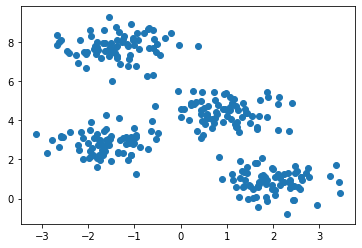

In [8]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:,0], X[:,1])

Even though we already know the optimal number of clusters, I figured we could still benefit from determining it using the elbow method. To get the values used in the graph, we train multiple models using a different number of clusters and storing the value of the intertia_ property (WCSS) every time.

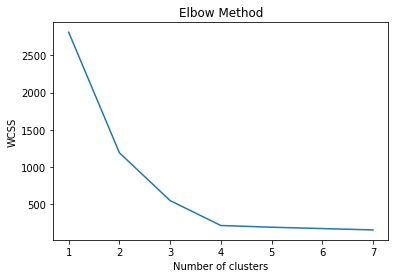

In [9]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
print("Optimal number of clusters: 4")

Optimal number of clusters: 4


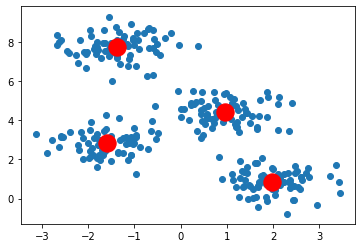

In [11]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

----

**Hard Code example**

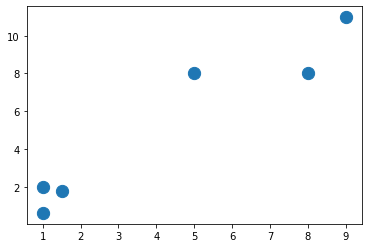

In [16]:
raw = np.array([[1,2],
              [1.5, 1.8],
              [5,8],
              [8,8],
              [1,0.6],
              [9,11]])

plt.scatter(raw[:,0], raw[:,1], s = 150)

colors = 10 *["g","r","c","b","k"]

------

**K-means with TensorFlow**

In [19]:
#Create aliases:
tf.sub = tf.subtract 

points_n = 200
clusters_n = 3
iteration_n = 100


#1. Let's generate random data points with a uniform distribution and assign them to a 2D Tensor constant.
# Then, randomly choose initial centroids from the set of data points:
points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0,0], [clusters_n, -1]))

In [22]:
#2. Now we want to be able to do element-wise subtraction of points and centroids that are 2D tensors.
# Because the tensors have different shape, let's expend points and centroids into 3 dimensions, 
# which allows us to use the broadcasting feature of subtraction operation:

points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

In [23]:
#3. Then, calculate the distances between points and centroids and determine the cluster assignments:
distances = tf.reduce_sum(tf.square(tf.sub(points_expanded, centroids_expanded)), 2)
assignments = tf.argmin(distances, 0)


In [25]:
?tf.reduce_sum

In [29]:
?tf.argmin

In [32]:
# 4. Next, we can compare each cluster with a cluter assignments vector, get points assigned to each cluster,
# and calculate mean values.
# These mean values are refined centroids, so let's update the centroids variable with the new values:

means = []
for c in range(clusters_n):
    means.append(tf.reduce_mean(tf.gather(points, tf.reshape(tf.where(tf.equal(assignments,
                                                                              c)), [1, -1])), 
                               reduction_indices = [1]))
new_centroids = tf.concat(means, 0)
update_centroids = tf.assign(centroids, new_centroids)
init = tf.global_variables_initializer()

In [33]:
# 5. Next we run the graph. For each iteration, we update the centroids and return their values along with 
# the cluster assignments values:

with tf.Session() as sess:
    sess.run(init)
    for step in range(iteration_n):
        [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, 
                                                                           centroids, points, assignments])
        

centroids
 [[3.33379441 7.83811057]
 [8.16309342 4.84062978]
 [3.06286288 2.33704415]]


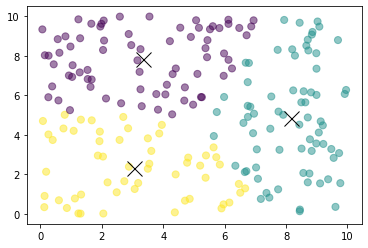

In [34]:
#6. Finally we display the coordinates of the final centroids and a multi-colored scatter plot
# showing how the data points have been clustered:

print("centroids" + "\n", centroid_values)

plt.scatter(points_values[:, 0], points_values[:, 1], c = assignment_values, s =50, alpha =0.5)
plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize = 15)
plt.pause(1)